In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv("data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [3]:
#data.drop(['slope', 'ca','thal'], axis=1, inplace=True)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [5]:
data.mean()

age           47.826531
sex            0.724490
cp             2.982993
oldpeak        0.586054
num            0.360544
dtype: float64

In [6]:
data.median()

age           49.0
sex            1.0
cp             3.0
oldpeak        0.0
num            0.0
dtype: float64

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [8]:
data.replace('?', np.nan, inplace=True)

In [9]:
median=data['chol'].median()
data['chol'].fillna(median,inplace=True)
median=data['slope'].median()
data['slope'].fillna(median,inplace=True)
median=data['ca'].median()
data['ca'].fillna(median,inplace=True)
median=data['thal'].median()
data['thal'].fillna(median,inplace=True)
median=data['fbs'].median()
data['fbs'].fillna(median,inplace=True)
median=data['restecg'].median()
data['restecg'].fillna(median,inplace=True)

In [10]:
cols=data.columns
for col in cols:
    median=data[col].median()
    data[col].fillna(median,inplace=True)
    

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2,0,6,0
1,29,1,2,120,243,0,0,160,0,0.0,2,0,6,0
2,29,1,2,140,243,0,0,170,0,0.0,2,0,6,0
3,30,0,1,170,237,0,1,170,0,0.0,2,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2,0,6,0


In [12]:
data.corr()

,age,sex,cp,oldpeak,num
age,1.000000,0.013618,0.145826,0.177707,0.159315
sex,0.013618,1.000000,0.249875,0.118931,0.272781
cp,0.145826,0.249875,1.000000,0.353109,0.505864
oldpeak,0.177707,0.118931,0.353109,1.000000,0.545700
num,0.159315,0.272781,0.505864,0.545700,1.000000


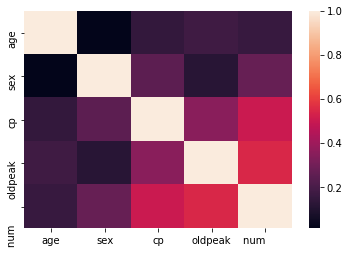

In [13]:
sn.heatmap(data.corr())

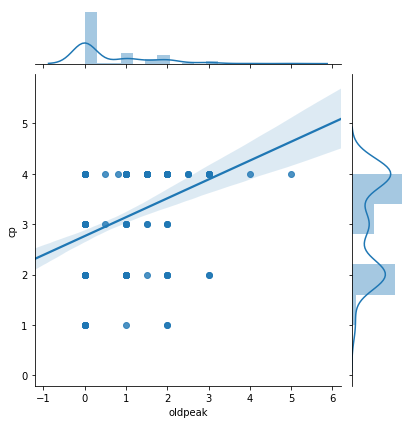

In [14]:
sn.jointplot(x="oldpeak",y="cp",data=data,kind="reg")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245B1BA2160>,
      dtype=object)

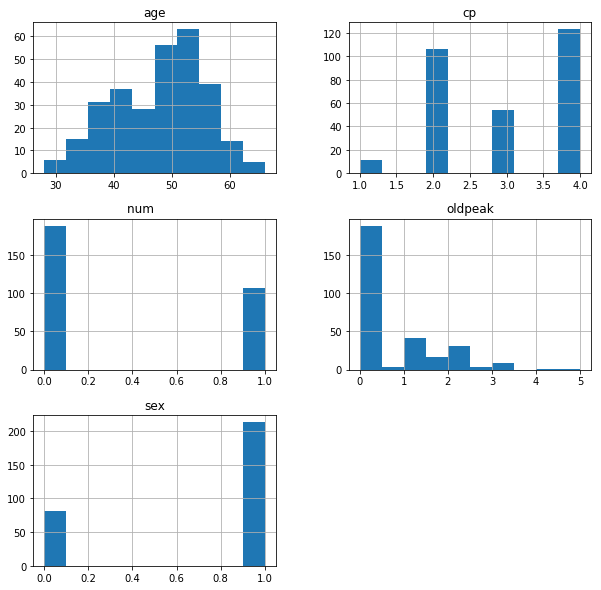

In [15]:
data.hist(figsize=(10,10))

In [16]:
#sn.pairplot(data)

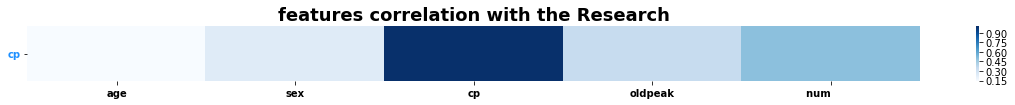

In [17]:
corr = data.corr()
f,ax=plt.subplots(figsize=(20,1))
sn.heatmap(corr.sort_values(by=['cp'],ascending=False).head(1), cmap='Blues')
plt.title("features correlation with the Research", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

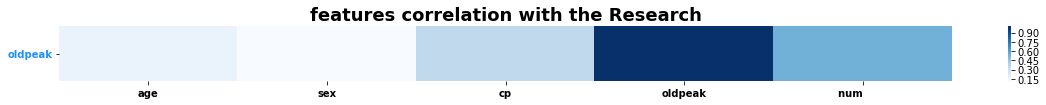

In [18]:
corr = data.corr()
f,ax=plt.subplots(figsize=(20,1))
sn.heatmap(corr.sort_values(by=['oldpeak'],ascending=False).head(1), cmap='Blues')
plt.title("features correlation with the Research", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [19]:
real_x=data.iloc[:,:-1].values
real_y=data.iloc[:,-1].values

In [20]:
train_x,test_x,train_y,test_y=train_test_split(real_x,real_y,test_size=.2,random_state=0)

In [21]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)

In [22]:
cls=KNeighborsClassifier(n_neighbors=5)
cls.fit(train_x,train_y)
pred_y=cls.predict(test_x)

In [23]:
pred_y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
test_y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
cs=confusion_matrix(test_y,pred_y)
cs

array([[31,  2],
       [ 5, 21]], dtype=int64)

In [26]:
print(cls.score(train_x,train_y)*100)
print(cls.score(test_x,test_y)*100)

88.51063829787233
88.13559322033898


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
ac=accuracy_score(test_y,pred_y)
ac*100

88.13559322033898

In [29]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.91      0.81      0.86        26

    accuracy                           0.88        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.88      0.88      0.88        59



In [30]:
x=[[40,1,3,120,150,0,0,150,1,1.5,2,0,7]]        

In [31]:
pred_y1=cls.predict(x)
pred_y1

array([0], dtype=int64)

In [32]:
if pred_y1==1:
    print("aave go")
else:
    print("koni aave")

koni aave


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


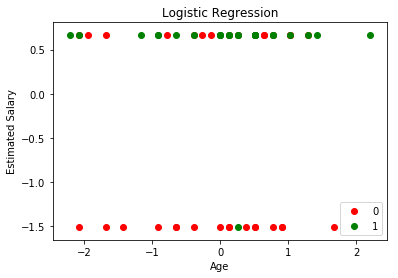

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = test_x,test_y

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


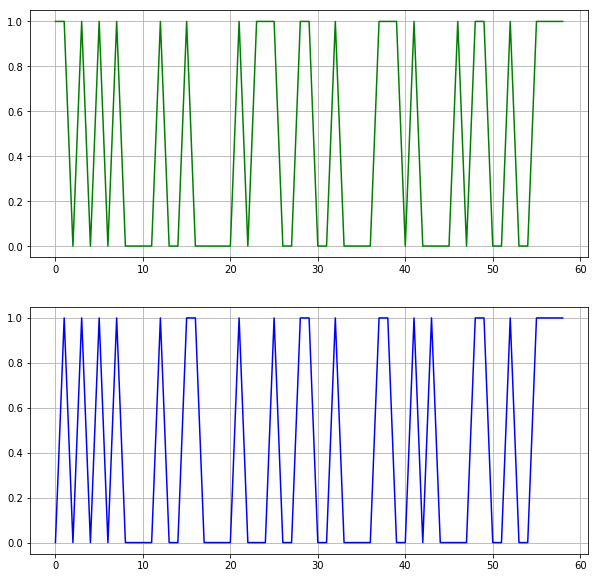

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(test_y,color="green")
plt.grid()
plt.subplot(2,1,2)
plt.plot(pred_y,color="blue")

plt.grid()

In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))

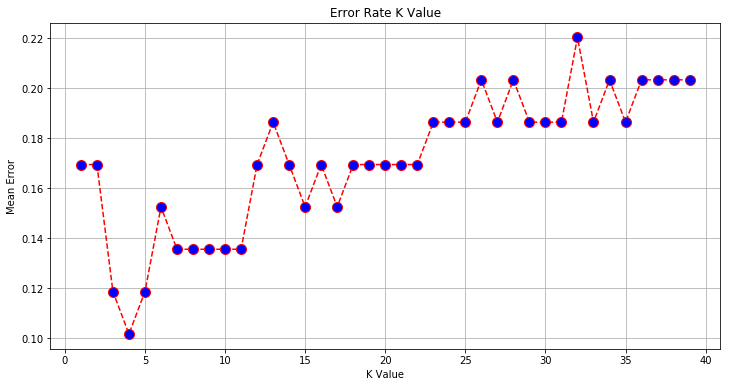

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

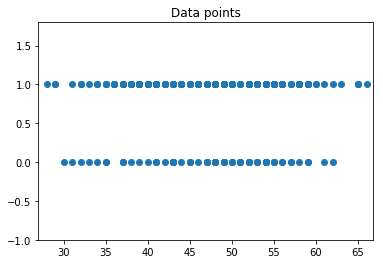

In [37]:
x_min, x_max = real_x[:, 0].min() - 1, real_x[:, 0].max() + 1
y_min, y_max = real_x[:, 1].min() - 1, real_x[:, 1].max() + 1
h=0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Put the result into a color plot
plt.figure()
plt.scatter(real_x[:, 0], real_x[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

Text(0.5, 0, 'Number of Neighbors')

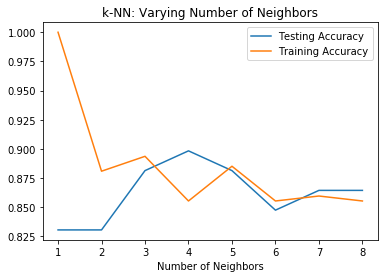

In [38]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(train_x,train_y)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_x, train_y)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(test_x, test_y)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


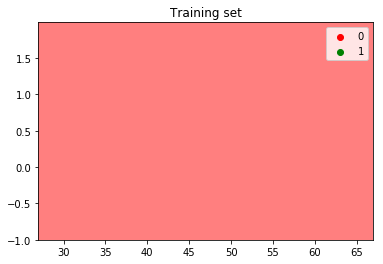

In [39]:
from matplotlib.colors import ListedColormap
x_set,y_set=test_x,test_y
x1, x2 = np.meshgrid(np.arange(start = real_x[:, 0].min() - 1, stop = real_x[:, 0].max() + 1, step = 0.01),
                     np.arange(start = real_x[:, 1].min() - 1, stop = real_x[:, 1].max() + 1, step = 0.01))
Xpred = np.array([x1.ravel(), x2.ravel()] + [np.repeat(0, x1.ravel().size) for _ in range(11)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = cls.predict(Xpred).reshape(x1.shape)   # is a matrix of 0's and 1's !
plt.contourf(x1, x2, pred,alpha = 0.50, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
            c=ListedColormap(('red','green'))(i),label=j)
plt.title('Training set')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()